In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from ukat.data import fetch
from ukat.utils.tools import convert_to_pi_range
from ukat.mapping.t1 import T1, magnitude_correct
from ukat.mapping.diffusion import ADC, DTI
from ukat.moco.mdr import MotionCorrection

# Ensure figures are rendered in the notebook
%matplotlib inline

# Initialise output path for the Model-Driven Registration process
directory = 'motion_correction_output'
os.makedirs(directory, exist_ok=True)
OUTPUT_DIR = os.path.join(os.getcwd(), directory)

In [2]:
import nibabel as nib
from dipy.io import read_bvals_bvecs
image_file = os.path.join("/Users/kteh/Desktop/AFFIRM/Images/ASL/nifti/3202/", "BGS_1500_3202.nii.gz")
pixel_array = nib.load(image_file).get_fdata()
affine_asl = nib.load(image_file).affine
# Pre-processing as preparation for the Model-Driven Registration process
list_input_parameters_dwi = [affine_asl, None, False]

In [3]:
mask_flag = True
# The bounding box is set to 1/6 of the Field Of View (FOV). This ratio can be changed in the lines below.
if mask_flag == True:
    x_asl = np.shape(pixel_array)[0]
    y_asl = np.shape(pixel_array)[1]
    mask_moco_asl = np.ones(np.shape(pixel_array))
    mask_moco_asl[:int(x_asl/6), ...] = 0
    mask_moco_asl[int(5*x_asl/6):, ...] = 0
    mask_moco_asl[:, :int(y_asl/6), ...] = 0
    mask_moco_asl[:, int(5*y_asl/6):, ...] = 0
else:
    mask_moco_asl = None

Starting MDR iteration 1
Fitting signal model..
Finished fitting signal model (2.9901663462320965e-05 min)
Exporting fit.._unregistered


MovieWriter ffmpeg unavailable; using Pillow instead.


Performing coregistration..


Coregistration progress: 100%|██████████| 20/20 [00:19<00:00,  1.01it/s]


Finished coregistration (0.33050413529078165 min)
Finished MDR iteration 1 after 0.34904514948527016 min
Improvement after MDR iteration 1: 1.0133423974507514 pixels
Starting MDR iteration 2
Fitting signal model..
Finished fitting signal model (5.801916122436523e-05 min)
Performing coregistration..


Coregistration progress: 100%|██████████| 20/20 [00:19<00:00,  1.02it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


Finished coregistration (0.3266985177993774 min)
Finished MDR iteration 2 after 0.326884917418162 min
Improvement after MDR iteration 2: 0.08847517081497734 pixels
Fitting signal model..
Finished fitting signal model (2.9746691385904948e-05 min)
Calculation time: 0.6760139664014181 min
Starting MDR iteration 1
Fitting signal model..
Finished fitting signal model (2.8765201568603517e-05 min)
Exporting fit.._unregistered
Performing coregistration..


Coregistration progress: 100%|██████████| 20/20 [00:19<00:00,  1.03it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


Finished coregistration (0.3221712311108907 min)
Finished MDR iteration 1 after 0.3377703030904134 min
Improvement after MDR iteration 1: 0.33180996191857887 pixels
Fitting signal model..
Finished fitting signal model (3.1495094299316405e-05 min)
Calculation time: 0.33781071901321413 min
Starting MDR iteration 1
Fitting signal model..
Finished fitting signal model (2.574920654296875e-05 min)
Exporting fit.._unregistered
Performing coregistration..


Coregistration progress: 100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


Finished coregistration (0.3402461647987366 min)
Finished MDR iteration 1 after 0.3567395846048991 min
Improvement after MDR iteration 1: 0.26957830787372233 pixels
Fitting signal model..
Finished fitting signal model (5.033413569132487e-05 min)
Calculation time: 0.3568248669306437 min
Starting MDR iteration 1
Fitting signal model..
Finished fitting signal model (4.536708196004232e-05 min)
Exporting fit.._unregistered


MovieWriter ffmpeg unavailable; using Pillow instead.


Performing coregistration..


Coregistration progress: 100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


Finished coregistration (0.5276491840680441 min)
Finished MDR iteration 1 after 0.551494034131368 min
Improvement after MDR iteration 1: 0.2984434961363644 pixels
Fitting signal model..
Finished fitting signal model (3.108580907185872e-05 min)
Calculation time: 0.5515350659688314 min
Starting MDR iteration 1
Fitting signal model..
Finished fitting signal model (5.849997202555339e-05 min)
Exporting fit.._unregistered


MovieWriter ffmpeg unavailable; using Pillow instead.


Performing coregistration..


Coregistration progress: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]

Finished coregistration (0.4562710007031759 min)
Finished MDR iteration 1 after 0.4772707223892212 min
Improvement after MDR iteration 1: 0.38585048968355945 pixels
Fitting signal model..
Finished fitting signal model (4.403193791707357e-05 min)
Calculation time: 0.47733021179835 min


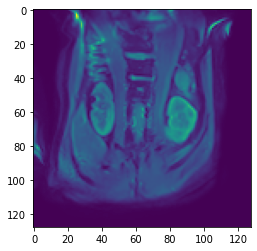

In [4]:
asl_registration = MotionCorrection(pixel_array, affine_asl, ' ', list_input_parameters_dwi, convergence=1, multithread=False, log=False, mask=mask_moco_asl)

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


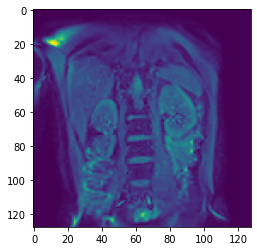

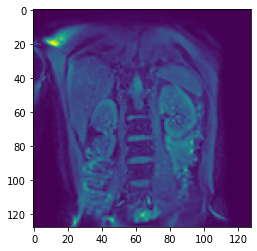

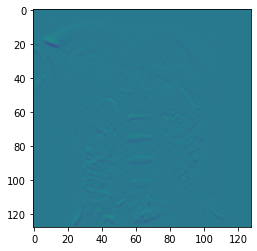

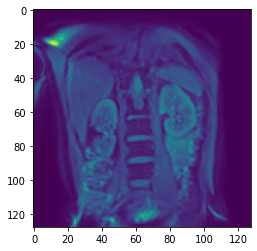

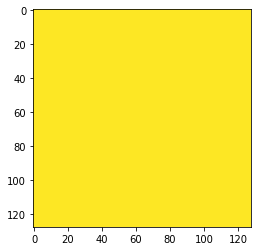

In [5]:
# Get the DWI coregistered pixel_array and the array with the difference between the original and the motion corrected
asl_moco_array = asl_registration.get_coregistered()
asl_moco_diff_array = asl_registration.get_diff_orig_coreg()
asl_registration.get_elastix_parameters(output_directory=OUTPUT_DIR, base_file_name='ASL_Elastix', export=True)
asl_registration.get_improvements(output_directory=OUTPUT_DIR, base_file_name='ASL_improvements', export=True)
# Save motion corrected diffusion sequence to NIfTI
asl_registration.to_nifti(output_directory=OUTPUT_DIR, base_file_name='ASL_motion_corrected', maps=['original', 'coregistered', 'difference', 'mask', 'model_fit', 'deformation_field', 'parameters'])
asl_registration.to_gif(output_directory=OUTPUT_DIR, base_file_name='ASL_motion_corrected', maps=['original', 'coregistered', 'difference', 'model_fit', 'deformation_field'])

IndexError: index 40 is out of bounds for axis 3 with size 20

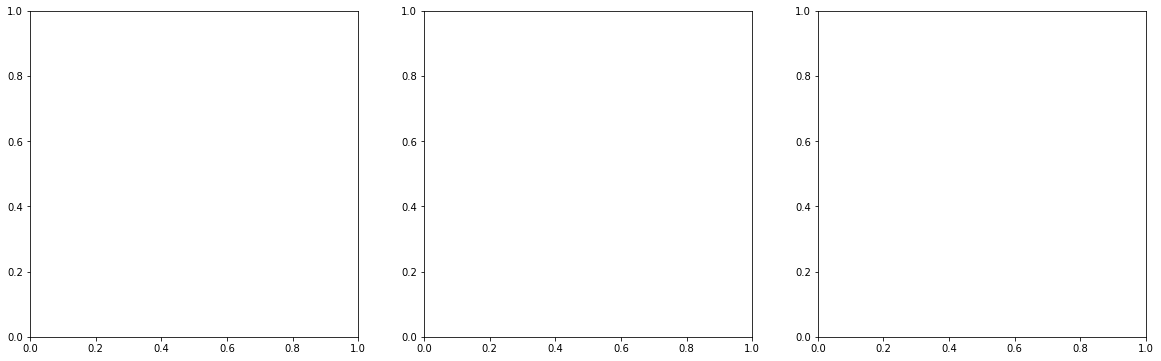

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Display the DWI original data
im = ax1.imshow(np.rot90(pixel_array[..., 4, 40]), clim=(0, 100000))
cb = fig.colorbar(im, ax=ax1)
cb.set_label('DWI Original')
ax1.axis('off')

# Display the DWI co-registered data
im2 = ax2.imshow(np.rot90(asl_moco_array[..., 4, 40]), clim=(0, 100000))
cb = fig.colorbar(im2, ax=ax2)
cb.set_label('DWI Moco')
ax2.axis('off')

# Display the difference image between DWI original data and DWI co-registered data
im3 = ax3.imshow(np.rot90(asl_moco_diff_array[..., 4, 40]), clim=(0, 100000))
cb = fig.colorbar(im3, ax=ax3)
cb.set_label('DWI Moco Difference')
ax3.axis('off')

plt.show()